In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime

class FundamentalData:
    def __init__(self, ticker, api_key):
        self.ticker = ticker
        self.api_key = api_key
        self.data = {}

    def get_stock_info(self):
        stock = yf.Ticker(self.ticker)
        self.data['info'] = stock.info
        return self.data['info']
    
    def get_historical_data(self, period='max', interval='1d'):
        stock = yf.Ticker(self.ticker)
        hist_data = stock.history(period=period, interval=interval)
        hist_data = hist_data.dropna()  # Remove rows with NaN values
        self.data['historical'] = hist_data
        return hist_data

    def get_financials(self):
        stock = yf.Ticker(self.ticker)
        self.data['financials'] = stock.financials.dropna(axis=1, how='all')
        return self.data['financials']
    
    def get_balance_sheet(self):
        stock = yf.Ticker(self.ticker)
        self.data['balance_sheet'] = stock.balance_sheet.dropna(axis=1, how='all')
        return self.data['balance_sheet']

    def get_cashflow(self):
        stock = yf.Ticker(self.ticker)
        self.data['cashflow'] = stock.cashflow.dropna(axis=1, how='all')
        return self.data['cashflow']
    
    def get_income_statement(self, period='quarter'):
        # Replace with API calls using the provided api_key
        # Example placeholder for fetching income statements using an external API
        # income_statement = fa.income_statement(self.ticker, self.api_key, period=period).T
        # self.data['income_statement'] = income_statement.dropna(axis=1, how='all')
        return self.data.get('income_statement', pd.DataFrame())

    def clean_data(self, dataframe):
        # Fill or drop NaN values, depending on strategy
        dataframe.fillna(0, inplace=True)  # Filling NaN values with 0
        return dataframe

    def merge_data(self):
        # Example merging of different financial data for analysis
        if 'historical' in self.data and 'income_statement' in self.data:
            merged_data = self.data['historical'].merge(self.data['income_statement'], left_index=True, right_index=True, how='outer')
            self.data['merged'] = self.clean_data(merged_data)
            return self.data['merged']
        return pd.DataFrame()
    
    def save_to_csv(self, dataframe, filename):
        """Saves the provided DataFrame to a CSV file."""
        try:
            dataframe.to_csv(filename, index=True)
            print(f"Data successfully saved to {filename}")
        except Exception as e:
            print(f"An error occurred while saving to CSV: {e}")

# Example usage
api_key = 'your_api_key_here'
fd = FundamentalData('MSFT', api_key)
print(fd.get_stock_info())
print(fd.get_historical_data())
print(fd.get_financials())
print(fd.get_balance_sheet())
print(fd.get_cashflow())


{'address1': 'One Microsoft Way', 'city': 'Redmond', 'state': 'WA', 'zip': '98052-6399', 'country': 'United States', 'phone': '425 882 8080', 'website': 'https://www.microsoft.com', 'industry': 'Software - Infrastructure', 'industryKey': 'software-infrastructure', 'industryDisp': 'Software - Infrastructure', 'sector': 'Technology', 'sectorKey': 'technology', 'sectorDisp': 'Technology', 'longBusinessSummary': 'Microsoft Corporation develops and supports software, services, devices and solutions worldwide. The Productivity and Business Processes segment offers office, exchange, SharePoint, Microsoft Teams, office 365 Security and Compliance, Microsoft viva, and Microsoft 365 copilot; and office consumer services, such as Microsoft 365 consumer subscriptions, Office licensed on-premises, and other office services. This segment also provides LinkedIn; and dynamics business solutions, including Dynamics 365, a set of intelligent, cloud-based applications across ERP, CRM, power apps, and pow

In [2]:
# Example usage
api_key = 'your_api_key_here'
fd = FundamentalData('MSFT', api_key)

# Fetch some data
hist_data = fd.get_historical_data()

# Save the historical data to a CSV file
fd.save_to_csv(hist_data, 'historical_data.csv')

Data successfully saved to historical_data.csv


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Summary Statistics: {'SPY': {'mean': 0.010752180492949468, 'std': 0.042771159901071255, 'skewness': -0.378079331100335, 'kurtosis': 0.5373133993539363}, 'QQQ': {'mean': 0.013934687512573408, 'std': 0.050633307781616635, 'skewness': -0.22940124590440264, 'kurtosis': 0.13273664125997486}, 'SPYI': {'mean': -0.003222524017597511, 'std': 0.0664289165273292, 'skewness': -0.143327609811592, 'kurtosis': -1.7810232427463473}, 'UPRO': {'mean': 0.028061050270136355, 'std': 0.13295757679688344, 'skewness': -0.428483280059104, 'kurtosis': 1.0046472347190294}, 'TQQQ': {'mean': 0.036381089265199215, 'std': 0.15846381143781077, 'skewness': -0.11149350400781585, 'kurtosis': 0.10717724815135954}}
Correlation Matrix:
            SPY       QQQ      SPYI      UPRO      TQQQ
SPY   1.000000  0.925844  0.996204  0.996742  0.926641
QQQ   0.925844  1.000000  0.977709  0.918518  0.994534
SPYI  0.996204  0.977709  1.000000  0.993725  0.978744
UPRO  0.996742  0.918518  0.993725  1.000000  0.926871
TQQQ  0.926641  

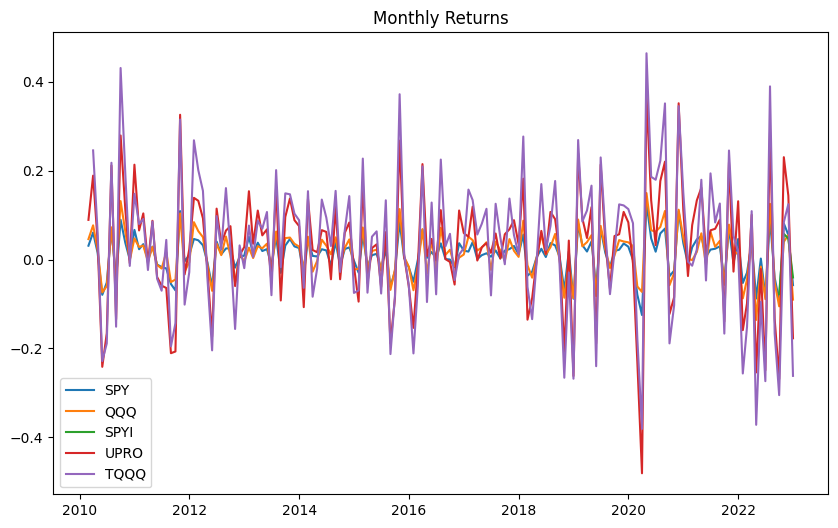

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


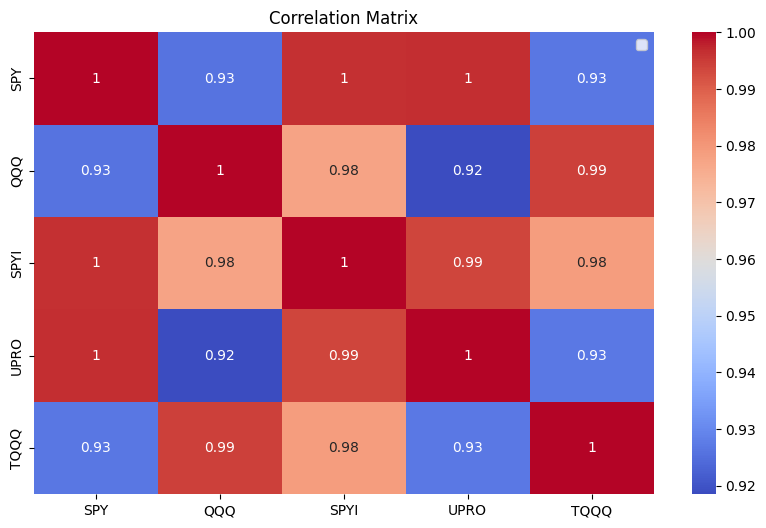

In [3]:
# Import necessary libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Set API keys for data retrieval (if needed)
# quandl.ApiConfig.api_key = "YOUR_QUANDL_API_KEY"
# av_key = "YOUR_ALPHA_VANTAGE_API_KEY"

# Utility function to fetch historical prices
def fetch_data(tickers, start_date="2010-01-01", end_date="2022-12-31"):
    """Fetch historical adjusted close prices for given tickers from Yahoo Finance."""
    try:
        return {ticker: yf.download(ticker, start=start_date, end=end_date)['Adj Close'] for ticker in tickers}
    except Exception as e:
        print(f"Error fetching data: {e}")
        return {}

# Utility function to calculate monthly returns
def calculate_monthly_returns(data):
    """Calculate monthly returns for each ticker."""
    return {ticker: prices.resample('M').ffill().pct_change().dropna() for ticker, prices in data.items()}

# Utility function to calculate summary statistics
def calculate_summary_statistics(returns):
    """Calculate mean, standard deviation, skewness, and kurtosis for each ticker."""
    return {ticker: {
        'mean': returns[ticker].mean(),
        'std': returns[ticker].std(),
        'skewness': skew(returns[ticker]),
        'kurtosis': kurtosis(returns[ticker])
    } for ticker in returns}

# Utility function to calculate correlation matrix
def calculate_correlation_matrix(returns):
    """Calculate the correlation matrix for the provided returns DataFrame."""
    combined_returns = pd.DataFrame(returns)
    return combined_returns.corr()

# Utility function to calculate Kelly Criterion
def calculate_kelly_criterion(returns):
    """Calculate Kelly Criterion allocations based on returns."""
    kelly_fractions = {}
    for ticker, ret in returns.items():
        mean_ret = ret.mean()
        std_ret = ret.std()
        kelly_fractions[ticker] = (mean_ret / std_ret ** 2) if std_ret != 0 else 0
    return kelly_fractions

# Utility function to visualize data
def visualize_data(data, title, plot_type="line"):
    """Visualize data using specified plot type."""
    plt.figure(figsize=(10, 6))
    if plot_type == "line":
        for label, series in data.items():
            plt.plot(series, label=label)
    elif plot_type == "heatmap":
        sns.heatmap(pd.DataFrame(data), annot=True, cmap='coolwarm')
    plt.title(title)
    plt.legend()
    plt.show()

# Main execution flow
if __name__ == "__main__":
    # Define the list of tickers
    tickers = ['SPY', 'QQQ', 'SPYI', 'UPRO', 'TQQQ']

    # Fetch historical data
    data = fetch_data(tickers)

    # Calculate monthly returns
    returns = calculate_monthly_returns(data)

    # Calculate summary statistics
    summary_stats = calculate_summary_statistics(returns)
    print("Summary Statistics:", summary_stats)

    # Calculate correlation matrix
    correlation_matrix = calculate_correlation_matrix(returns)
    print("Correlation Matrix:\n", correlation_matrix)

    # Calculate Kelly Criterion
    kelly_fractions = calculate_kelly_criterion(returns)
    print("Kelly Criterion Allocations:", kelly_fractions)

    # Visualize returns
    visualize_data(returns, "Monthly Returns", plot_type="line")

    # Visualize correlation matrix
    visualize_data(correlation_matrix, "Correlation Matrix", plot_type="heatmap")


In [ ]:

import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Function to load data for multiple assets
def load_data(asset_list, data_path, years):
    all_data = {}
    for asset in asset_list:
        data = []
        for year in years:
            files = glob.glob(f'{data_path}/{asset}_{year}*.csv')
            for file in files:
                df = pd.read_csv(file, parse_dates=['Datetime'], index_col='Datetime')
                data.append(df)
        all_data[asset] = pd.concat(data)
    return all_data

# Function to categorize market session
def categorize_session(time):
    if time < pd.Timestamp(year=2000, month=1, day=1, hour=9, minute=30).time():
        return 'Pre-market'
    elif time < pd.Timestamp(year=2000, month=1, day=1, hour=16, minute=0).time():
        return 'Regular market'
    else:
        return 'Post-market'

# Function to calculate intraday returns
def calculate_intraday_returns(data):
    data['Session'] = data.index.time.map(categorize_session)
    data['Intraday_Return'] = data.groupby('Session')['Close'].pct_change() * 100
    return data.dropna()

# Function to analyze nightshare strategy
def analyze_nightshare_strategy(data, asset):
    session_returns = data.groupby('Session')['Intraday_Return'].mean()
    print(f'Average returns by session for {asset}:')
    print(session_returns)
    session_returns.plot(kind='bar')
    plt.title(f'Nightshare Strategy Analysis for {asset}')
    plt.xlabel('Session')
    plt.ylabel('Average Return (%)')
    plt.show()

# Function to define percentage-based stop order thresholds
def define_stop_orders(thresholds):
    stop_loss = thresholds['stop_loss']
    take_profit = thresholds['take_profit']
    trailing_stop = thresholds['trailing_stop']
    return stop_loss, take_profit, trailing_stop

# Function to simulate stop orders
def simulate_stop_orders(data, stop_loss, take_profit, trailing_stop):
    # Simulate stop orders based on intraday data
    data['Stop_Loss'] = data['Close'] * (1 - stop_loss / 100)
    data['Take_Profit'] = data['Close'] * (1 + take_profit / 100)
    data['Trailing_Stop'] = data['Close'] * (1 - trailing_stop / 100)
    return data

# Function to backtest strategies
def backtest_strategies(data, stop_loss, take_profit, trailing_stop):
    # Backtest strategies using historical data
    data['Strategy_Return'] = data['Close'].pct_change() * 100
    data['Strategy_Return'] = data['Strategy_Return'].cumsum()
    return data

# Function to optimize parameters
def optimize_parameters(data, stop_loss_range, take_profit_range, trailing_stop_range):
    # Optimize parameters using grid search
    param_grid = {
        'stop_loss': stop_loss_range,
        'take_profit': take_profit_range,
        'trailing_stop': trailing_stop_range
    }
    grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(data['Close'].values.reshape(-1, 1), data['Strategy_Return'].values)
    return grid_search.best_params_

# Main function
def main():
    asset_list = ['AAPL', 'GOOG', 'AMZN']
    data_path = 'data'
    years = range(2010, 2022)
    data = load_data(asset_list, data_path, years)
    for asset in asset_list:
        data[asset] = calculate_intraday_returns(data[asset])
        analyze_nightshare_strategy(data[asset], asset)
        stop_loss, take_profit, trailing_stop = define_stop_orders({'stop_loss': 2, 'take_profit': 5, 'trailing_stop': 1})
        data[asset] = simulate_stop_orders(data[asset], stop_loss, take_profit, trailing_stop)
        data[asset] = backtest_strategies(data[asset], stop_loss, take_profit, trailing_stop)
        optimized_params = optimize_parameters(data[asset], [1, 2, 3], [4, 5, 6], [0.5, 1, 1.5])
        print(f'Optimized parameters for {asset}: {optimized_params}')

if __name__ == '__main__':
    main()


In [7]:
import pandas as pd
import numpy as np
import os
from datetime import datetime, timedelta
import yfinance as yf
from scipy.stats import kurtosis, skew

class SPYDataAnalyzer:
    def __init__(self, years=10, cache_file='spy_data.csv'):
        self.years = years
        self.cache_file = cache_file
        self.data = None
    
    def fetch_data(self):
        # Check if data is cached and is up-to-date
        if os.path.exists(self.cache_file):
            modified_time = datetime.fromtimestamp(os.path.getmtime(self.cache_file))
            if datetime.now() - modified_time < timedelta(days=1):
                self.data = pd.read_csv(self.cache_file, parse_dates=['Date'], index_col='Date')
                return

        # Fetch data from Yahoo Finance
        end_date = datetime.now()
        start_date = end_date - timedelta(days=self.years * 365)
        spy = yf.download('SPY', start=start_date, end=end_date)
        self.data = spy[['Open', 'High', 'Low', 'Close']]
        self.data.to_csv(self.cache_file)
    
    def calculate_indicators(self):
        if self.data is None:
            raise ValueError("No data available. Please fetch data first.")
        
        # Calculate moving averages
        self.data['20_MA'] = self.data['Close'].rolling(window=20).mean()
        self.data['52_Week_MA'] = self.data['Close'].rolling(window=260).mean()
        
        # Calculate Bollinger Bands for 20-day and 52-week
        self.data['20_Upper_BB'] = self.data['20_MA'] + 2 * self.data['Close'].rolling(window=20).std()
        self.data['20_Lower_BB'] = self.data['20_MA'] - 2 * self.data['Close'].rolling(window=20).std()
        self.data['52_Upper_BB'] = self.data['52_Week_MA'] + 2 * self.data['Close'].rolling(window=260).std()
        self.data['52_Lower_BB'] = self.data['52_Week_MA'] - 2 * self.data['Close'].rolling(window=260).std()
        
        # Calculate daily returns and other statistics
        self.data['Daily_Return'] = self.data['Close'].pct_change()
        self.data['Cumulative_Return'] = (1 + self.data['Daily_Return']).cumprod() - 1
        self.data['Std_Dev'] = self.data['Daily_Return'].rolling(window=20).std()
        
        # Calculate statistical metrics only where there are enough data points
        self.data['Skewness'] = self.data['Daily_Return'].rolling(window=20).apply(lambda x: skew(x.dropna()), raw=False)
        self.data['Kurtosis'] = self.data['Daily_Return'].rolling(window=20).apply(lambda x: kurtosis(x.dropna()), raw=False)
        self.data['Positive_Return_Percentage'] = self.data['Daily_Return'].rolling(window=20).apply(lambda x: (x > 0).mean() * 100, raw=False)
        
        # Calculate Kelly ratio and fraction based on available returns
        win_rate = self.data['Positive_Return_Percentage'] / 100
        loss_rate = 1 - win_rate
        avg_win = self.data[self.data['Daily_Return'] > 0]['Daily_Return'].mean()
        avg_loss = abs(self.data[self.data['Daily_Return'] <= 0]['Daily_Return'].mean())
        self.data['Kelly_Ratio'] = win_rate - (loss_rate / (avg_win / avg_loss))
        self.data['Kelly_Fraction'] = self.data['Kelly_Ratio'] / 2
        
        # Drop initial rows with NaN values after calculations
        self.data.dropna(inplace=True)

    def get_data(self):
        return self.data
    
    def save_to_csv(self, filename='spy_analyzed_data.csv'):
        if self.data is not None:
            self.data.to_csv(filename)
        else:
            raise ValueError("No data available to save. Please fetch and process data first.")

# Example usage
analyzer = SPYDataAnalyzer(years=10)
analyzer.fetch_data()
analyzer.calculate_indicators()
data = analyzer.get_data()
print(data.head())
data.to_csv('spy_analyzed_output.csv')


                  Open        High         Low       Close       20_MA  \
Date                                                                     
2015-09-14  196.949997  197.009995  195.429993  196.009995  197.714001   
2015-09-15  196.610001  198.990005  195.960007  198.460007  197.107501   
2015-09-16  198.820007  200.410004  198.410004  200.179993  196.617501   
2015-09-17  200.020004  202.889999  199.279999  199.729996  196.188000   
2015-09-18  195.710007  198.679993  194.960007  195.449997  195.762000   

            52_Week_MA  20_Upper_BB  20_Lower_BB  52_Upper_BB  52_Lower_BB  \
Date                                                                         
2015-09-14  205.154193   210.258071   185.169930   217.385257   192.923128   
2015-09-15  205.146346   208.108348   186.106654   217.392008   192.900685   
2015-09-16  205.146231   205.950810   187.284192   217.392080   192.900382   
2015-09-17  205.140923   203.904356   188.471645   217.394991   192.886856   
2015-09-18  2